# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
# YOUR CODE HERE
%matplotlib inline

import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.svm import l1_min_c

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
df = pd.read_csv(filename, header= 0)

In [4]:
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [5]:
# Obtaining data types for all columns
df.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

## Creating a (Winsortized) Label Column


In [6]:
# Dealing with an outlier is better than removing the value itself
# Replace top and bottom 1% outlier values with corresponding percentile value
# Add it to df
df['label_host_response_rate'] = stats.mstats.winsorize(df['host_response_rate'], limits = [0.01, 0.01])

# Checking that label and winsortized label are not identical. The difference in length of the arrays is 2
len((df['host_response_rate'] - df['label_host_response_rate']).unique())

2

## Identifying Features with Highest Correlation With Label


In [7]:
# Observing correlations of all features with the label
corrs = df.corr()['label_host_response_rate']

In [8]:
# Sorting values of series in descending order
corrs_sorted = corrs.sort_values(ascending = False)

In [9]:
# NOTE: Seems like features have an extremely low correlation with label
# Saving column names to a list for top-5 correlation values to top_five_corr
ans = corrs_sorted[2:7].index
top_five_corr = list(ans)

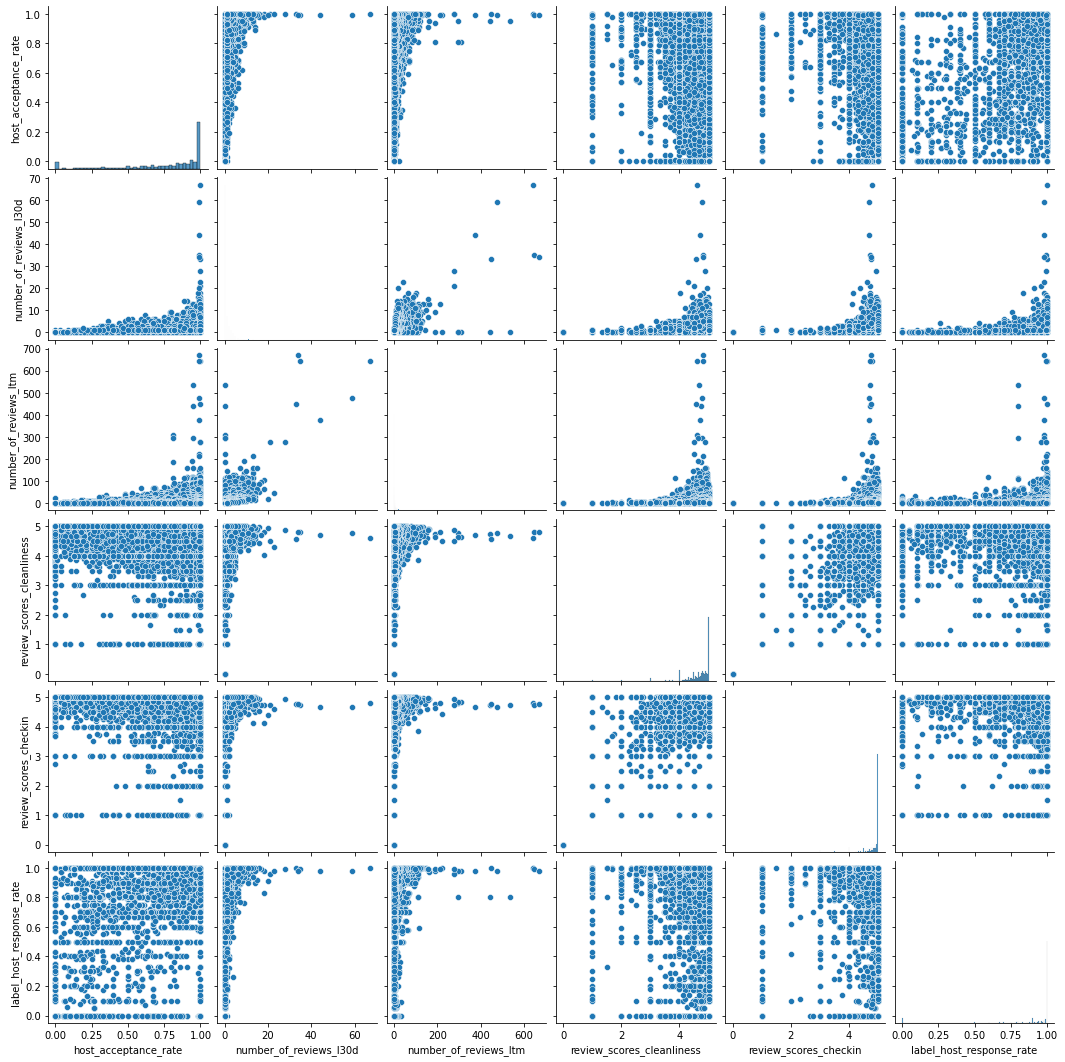

In [10]:
# Producing Bivariate Plots of label and top correlates
# Create a new dataframe containing top-5 and label

top_five_corr.append('label_host_response_rate')
df_sub = df[top_five_corr]
sns.pairplot(data = df_sub)

## Feature Selection and Engineering

In [11]:
df.shape

(28022, 51)

In [12]:
# Dropping columns with unstructured text
unstr_text_colnames = ['description', 'name', 'neighborhood_overview']
df.drop(unstr_text_colnames, axis = 1, inplace = True)

# Dropping columns that do not correlate to our label
no_corr_to_label_colnames = ['host_name', 'host_location', 'host_about']
df.drop(no_corr_to_label_colnames, axis = 1, inplace = True)

In [13]:
df.shape

(28022, 45)

## Addressing missingness, such as replacing missing values with means

In [14]:
# Checking if a given value in any data cell is missing. Summing up the resulting values and saving it to nan_count
# Note: 'host_response_rate' contains NAN values which we will be replacing with mean values
nan_count = np.sum(df.isnull(),axis = 0)

In [15]:
# Series that contains T/F values indicating whether the numnber of missing values is NOT zero
nan_detected = nan_count != 0

In [16]:
# Only replacing numerical columns
# Series that contains T if column is either int64 or float64
is_int_or_float = (df.dtypes == 'int64') | (df.dtypes == 'float64')

In [17]:
# Series of T values that contains missing values AND is of type int or float
to_impute = nan_detected & is_int_or_float

In [18]:
# List of to_impute column names
df.columns[to_impute]


Index(['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds',
       'label_host_response_rate'],
      dtype='object')

In [19]:
# Selected all to_impute columns to be selected
to_impute_selected = ['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds', 'label_host_response_rate']


In [20]:
# Keeping record of missingness: creating dummy variables
# Storing T/F series indicating missingness as a new variable in df
for colname in to_impute_selected:
    df[colname+'_na'] = df[colname].isnull()

In [21]:
# Replacing missing values with mean values of column
for colname in to_impute_selected:
    df[colname].fillna(np.mean(df[colname]), inplace = True)

In [22]:
# Checking our results. Count of missing values for each of the selected columns is 0.
for colname in to_impute_selected:
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))

host_response_rate missing values count :0
host_acceptance_rate missing values count :0
bedrooms missing values count :0
beds missing values count :0
label_host_response_rate missing values count :0


In [23]:
df.head

<bound method NDFrame.head of        host_response_rate  host_acceptance_rate  host_is_superhost  \
0                0.800000              0.170000               True   
1                0.090000              0.690000               True   
2                1.000000              0.250000               True   
3                1.000000              1.000000               True   
4                0.906901              0.791953               True   
...                   ...                   ...                ...   
28017            1.000000              1.000000               True   
28018            0.910000              0.890000               True   
28019            0.990000              0.990000               True   
28020            0.900000              1.000000               True   
28021            0.906901              0.791953               True   

       host_listings_count  host_total_listings_count  host_has_profile_pic  \
0                      8.0                        

## Categorizing label as true or false

In [24]:
# True if % of host responding is more than %50, False if less
# If label_host_response_rate is < .5: return False 
df['label_host_response_rate'] = np.where(df['label_host_response_rate'] > .5,True,False)
df.head

<bound method NDFrame.head of        host_response_rate  host_acceptance_rate  host_is_superhost  \
0                0.800000              0.170000               True   
1                0.090000              0.690000               True   
2                1.000000              0.250000               True   
3                1.000000              1.000000               True   
4                0.906901              0.791953               True   
...                   ...                   ...                ...   
28017            1.000000              1.000000               True   
28018            0.910000              0.890000               True   
28019            0.990000              0.990000               True   
28020            0.900000              1.000000               True   
28021            0.906901              0.791953               True   

       host_listings_count  host_total_listings_count  host_has_profile_pic  \
0                      8.0                        

## Addressing class imbalance in data sample to promote fair AI

In [25]:
# Below shows a major class imablance (more True values than False)
df['label_host_response_rate'].value_counts()

True     26894
False     1128
Name: label_host_response_rate, dtype: int64

In [26]:
from sklearn.utils import resample 

# Seperating majority and minority classes into seperate dataframes

df_majority = df[df['label_host_response_rate'] == True]
df_minority = df[df['label_host_response_rate'] == False]

# Previous attempts:
# Downsampling majority class led to inconsistent accuracy scores, dataset was too small as well
# Upsampling minority class had no changes when optimized

# Downsampling majority
df_majority_downsampled = resample(df_majority, replace=False,n_samples=10000)

# Upsampling minority class
df_minority_upsampled = resample(df_minority, replace = True, n_samples = 10000)

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_minority_upsampled, df_majority_downsampled])

# New balanced data frame
df_balanced['label_host_response_rate'].value_counts()

True     10000
False    10000
Name: label_host_response_rate, dtype: int64

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

Creating labeled examples from dataset

In [27]:
# Since I am implementing a logistic regression model, I must
# only use numeric columns
# Obtaining all columns names that have dtype float and int
feature_list_float = list(df_balanced.select_dtypes('float64'))

In [28]:
feature_list_int = list(df_balanced.select_dtypes('int64'))

In [29]:
feature_list = feature_list_int + feature_list_float

In [30]:
# Assigning label and features
y = df_balanced['label_host_response_rate']
X = df_balanced[feature_list]

In [31]:
# Creating training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 1234)

In [32]:
print(X_train.shape)
print(X_test.shape)

(13400, 36)
(6600, 36)


In [33]:
# Fitting and evaluating the model 
model_default = LogisticRegression(max_iter = 10000)
model_default.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# Output probability unlabeled example belongs to class True
proba_predictions = model_default.predict_proba(X_test)
proba_predictions_default = []
for i in proba_predictions:
    proba_predictions_default.append(i[1])
    
# Predict class labels for test set
class_label_predictions_default = model_default.predict(X_test)

In [35]:
# Evaluating accuracy of model using confusion matrix
c_m = confusion_matrix(y_test, class_label_predictions_default, labels=[True, False])
c_m

array([[2642,  647],
       [ 780, 2531]])

In [36]:
# Computing accuracy score
acc_score = accuracy_score(y_test, class_label_predictions_default)
print('Accuracy: ' + str(acc_score))

pd.DataFrame(c_m, columns = ['Predicted: Host Will Not Respond Within 24h', 'Predicted: Host Will Respond Within 24h'], index = ['Actual: Host Will Not Respond Within 24h', 'Actual: Host Will Respond Within 24h'])

Accuracy: 0.7837878787878788


,Predicted: Host Will Not Respond Within 24h,Predicted: Host Will Respond Within 24h
Actual: Host Will Not Respond Within 24h,2642,647
Actual: Host Will Respond Within 24h,780,2531


In [37]:
# Finding an optimal choice of hyperparameter C using GridSearchSV
cs = l1_min_c(X_train, y_train, loss = 'log') * np.logspace (0, 7, 16)
param_grid = dict(C = list(cs))
param_grid

{'C': [7.760846184253594e-11,
  2.2728759994406797e-10,
  6.656445941829098e-10,
  1.9494364227259497e-09,
  5.709206383498819e-09,
  1.6720236243357525e-08,
  4.896762899335887e-08,
  1.4340878049398562e-07,
  4.1999334551324474e-07,
  1.2300112285161335e-06,
  3.602265698821785e-06,
  1.0549755859190354e-05,
  3.089648515514101e-05,
  9.048482331562806e-05,
  0.0002649978859843891,
  0.0007760846184253594]}

In [38]:
# Using GridSearchCV to search over different values of hyperparameter C
# to find one that results in best cross-validation score

print('Running Grid Search...')
model = LogisticRegression(max_iter = 10000)

# Running a grid search with 5-fold cross-validation
grid = GridSearchCV(model, param_grid, cv = 5)

# Fitting model on training data
grid_search = grid.fit(X_train, y_train)
print('Done')


Running Grid Search...


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGIS

Done


In [39]:
# Retrieving the value of hyperparameter C for which best score was attained
best_C = grid_search.best_params_['C']
best_C

0.0007760846184253594

In [40]:
# Fitting and evaluating the optimal model

model_best = LogisticRegression(C = best_C, max_iter = 10000)
model_best.fit(X_train, y_train)

proba_predictions = model_best.predict_proba(X_test)
proba_predictions_best = []
for i in proba_predictions:
    proba_predictions_best.append(i[1])
class_label_predictions_best = model_best.predict(X_test)
c_m = confusion_matrix(y_test, class_label_predictions_best, labels=[True, False])
c_m

# Computing accuracy score
acc_score_best = accuracy_score(y_test, class_label_predictions_best)
print('Best Accuracy: ' + str(acc_score_best))

pd.DataFrame(c_m, columns = ['Predicted: Host Will Not Respond Within 24h', 'Predicted: Host Will Respond Within 24h'], index = ['Actual: Host Will Not Respond Within 24h', 'Actual: Host Will Respond Within 24h'])

Best Accuracy: 0.8639393939393939


,Predicted: Host Will Not Respond Within 24h,Predicted: Host Will Respond Within 24h
Actual: Host Will Not Respond Within 24h,2836,453
Actual: Host Will Respond Within 24h,445,2866


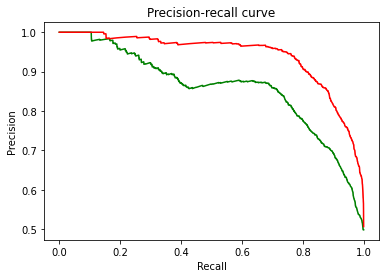

In [ ]:
# Plotting Precision-Recall Curves for Both Models
precision_default, recall_default, thresholds_default = precision_recall_curve(y_test, proba_predictions_default)
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, proba_predictions_best)

# Creating two seaborn lineplots to visualize precision-recall curve for both models
fig = plt.figure()
ax = fig.add_subplot(111)

# Default - green, Best - red
sns.lineplot(x = recall_default, y = precision_default, color = 'g')
sns.lineplot(x = recall_best, y = precision_best, color = 'r')
plt.title("Precision-recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


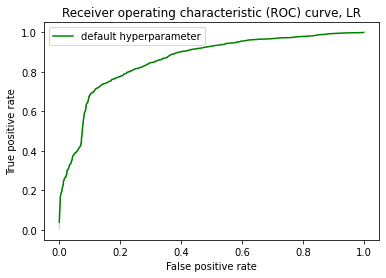

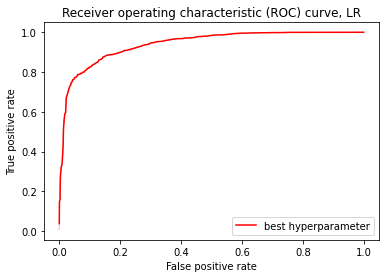

In [ ]:
# Plotting ROC curves and computing AUC for both models
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr_default, tpr_default, thresholds_default = roc_curve(y_test, proba_predictions_default)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, proba_predictions_best)

# Creating two seaborn lineplots to visualize ROC curves for both models
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x = fpr_default, y=tpr_default, color = 'g')
plt.title("Receiver operating characteristic (ROC) curve, LR")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['default hyperparameter'])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=fpr_best, y=tpr_best, color='r')
plt.title("Receiver operating characteristic (ROC) curve, LR")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['best hyperparameter'])
plt.show()

In [ ]:
# Computing AUC for both models
auc_default = auc(fpr_default, tpr_default)
auc_best = auc(fpr_best, tpr_best)

print(auc_default)
print(auc_best)

0.8595197430568329
0.9402873989692632
